# Unit 5 - Financial Planning

In [48]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [49]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [50]:
# Set current amount of crypto assets
# YOUR CODE HERE!

crypto_assets = {
    "shares": [1.2,5.3,]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame
my_btc = 1.2
my_eth = 5.3

df_shares = pd.DataFrame(crypto_assets, index=tickers)


# Display shares data
df_shares

,shares
BTC,1.2
ETH,5.3


In [51]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [52]:
# Fetch current BTC price
# YOUR CODE HERE!

btc_response=requests.get(btc_url).json()
btc_price=btc_response['data']['1']['quotes']['CAD']['price']


# Fetch current ETH price
# YOUR CODE HERE!

eth_response=requests.get(eth_url).json()
eth_price=eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $67757.04
The current value of your 5.3 ETH is $20235.58


In [53]:
my_crypto_value = (my_btc_value + my_eth_value)
my_crypto_value

87992.6222656

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [54]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [55]:
# Set Alpaca API key and secret
# YOUR CODE HERE!


alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



# Create the Alpaca API object

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


# YOUR CODE HERE!

In [56]:
# Format current date as ISO format
# YOUR CODE HERE!

today = pd.Timestamp("2021-08-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
start_date=today
end_date=today

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df



# Preview DataFrame
# YOUR CODE HERE!
ticker_data




AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-08-17 00:00:00-04:00  115.98  116.09  115.93  115.95  4493522  444.24   

                                                             
                             high     low   close    volume  
time                                                         
2021-08-17 00:00:00-04:00  444.96  440.85  444.06  84161406

In [57]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_price = float(ticker_data["AGG"]["close"])
spy_price = float(ticker_data["SPY"]["close"])



# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $115.95
Current SPY closing price: $444.06


In [58]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_price * my_agg
my_spy_value = spy_price * my_spy

# Print current value of shares
print(f"The current value of your {my_agg} SPY shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} AGG shares is ${my_spy_value:0.2f}")

The current value of your 200 SPY shares is $23190.00
The current value of your 50 AGG shares is $22203.00


In [59]:
my_shares_value = (my_agg_value + my_spy_value)
my_shares_value

45393.0

### Savings Health Analysis

In [60]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12,000


# Consolidate financial assets data
# YOUR CODE HERE!

#df_savings = (my_crypto_value + my_shares_value)

savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]
# Create savings DataFrame

df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,87992.622266
shares,45393.000000


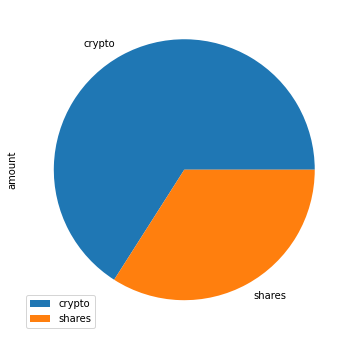

In [61]:
# Plot savings pie chart
# YOUR CODE HERE!
plot = df_savings.plot.pie(subplots=True, figsize=(11, 6))
#df_savings.plot(kind=pi)

In [62]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3



# Calculate total amount of savings

total_savings = float(df_savings.sum())

#total_savings = float(df_savings).sum() 
total_savings

133385.62226560002

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [63]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-18', tz='America/New_York').isoformat()

In [64]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]

# Get 1 year's worth of historical data for AAPL
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df




# Display sample data
ticker_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-08-28 00:00:00-04:00  110.17  110.24  110.10  110.170  2822250.0     NaN   
2017-08-29 00:00:00-04:00  110.48  110.49  110.26  110.330  1710077.0  243.11   
2017-08-30 00:00:00-04:00  110.27  110.33  110.24  110.290  1357572.0  244.83   
2017-08-31 00:00:00-04:00  110.31  110.46  110.31  110.435  4179400.0  246.73   
2017-09-01 00:00:00-04:00  110.19  110.22  109.91  109.960  2579681.0  247.92   

                                                               
                             high     low   close      volume  
time                                                           
2017-08-28 00:00:00-04:00     NaN     NaN     NaN         NaN  
2017-08-29 00:00:00-04:00  245.15  242.93  244.85  40179210.0  
2017-08-30 00:00:00-04:00  246.32  244.62  246.04  40088765.0  
2017-08-31 00:00:00-04:00  247.77  246.61  247.42  52550897.0  
2017-09-01 00:00:00-04:00  248.33  247.67  247.88  39588857.0

In [65]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

#mc_df = pd.DataFrame()
#mc_df["AGG"] = ticker_data["AGG"]["close"]
#mc_df["SPY"] = ticker_data["SPY"]["close"]
#mc_df.index = mc_df.index.date

limit = 1000

mc_thirty_year = MCSimulation(
    portfolio_data = ticker_data,
    weights= [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)




In [66]:
# Printing the simulation input data

mc_thirty_year.portfolio_data.head()




# YOUR CODE HERE!

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-08-28 00:00:00-04:00  110.17  110.24  110.10  110.170  2822250.0   
2017-08-29 00:00:00-04:00  110.48  110.49  110.26  110.330  1710077.0   
2017-08-30 00:00:00-04:00  110.27  110.33  110.24  110.290  1357572.0   
2017-08-31 00:00:00-04:00  110.31  110.46  110.31  110.435  4179400.0   
2017-09-01 00:00:00-04:00  110.19  110.22  109.91  109.960  2579681.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-08-28 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-08-29 00:00:00-04:00     0.001452  243.11  245.15  242.93  244.85   
2017-08-30 00:00:00-04:00    -0.000363  244.83  246.32  244.62  246.04   
2017-08-31 00:00:00-04:00     0.001315  246.73  247.77  246.61  247.42   
2017-09-01 00:00:00-04:00    -0.004301  247.92  248.33  247.67  247.88   

                                                    
                               volume daily_return  
time                                                
2017-08-28 00:00:00-04:00         NaN          NaN  
2017-08-29 00:00:00-04:00  40179210.0          NaN  
2017-08-30 00:00:00-04:00  40088765.0     0.004860  
2017-08-31 00:00:00-04:00  52550897.0     0.005609  
2017-09-01 00:00:00-04:00  39588857.0     0.001859

In [67]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998608,0.991496,1.005159,0.986485,1.006610,1.000757,1.007989,1.001011,0.993500,1.007536,...,0.990522,1.002291,1.003008,0.994164,1.002290,0.996620,1.002321,1.002530,0.999582,1.002682
2,1.003328,0.983897,0.994167,0.989770,1.001818,1.001381,1.009716,1.002541,0.992105,1.011088,...,0.983232,0.998635,1.014559,0.985252,1.004802,0.995702,0.994236,1.002174,0.995932,1.016204
3,0.994429,0.988118,0.998559,0.996000,1.013216,1.001386,1.009696,1.011397,0.992151,1.018916,...,0.981780,1.006562,1.009784,0.990914,1.016964,0.984685,0.990214,0.998570,0.998669,1.017842
4,0.990992,0.986389,0.998334,1.002480,1.012970,1.000396,1.016628,1.009235,0.999112,1.025050,...,0.984863,1.014957,1.010719,0.984130,1.010409,0.984751,0.991804,0.994288,1.000701,1.020019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.787411,7.280349,5.251986,9.836168,10.184672,11.927575,7.763525,20.141611,9.677270,8.640787,...,6.498608,4.735019,8.767211,8.890405,8.705791,5.783895,7.513254,13.162932,7.377192,11.468527
7557,11.812408,7.341486,5.252664,9.833670,10.165089,11.979436,7.697835,20.260280,9.610203,8.646847,...,6.420584,4.742428,8.712121,8.845969,8.695946,5.823386,7.559631,13.220195,7.362230,11.462401
7558,11.821859,7.357579,5.316827,9.804743,10.153605,11.894065,7.628198,20.214081,9.584353,8.640733,...,6.438613,4.776430,8.637483,8.828770,8.705991,5.797893,7.577675,13.191426,7.383592,11.486263
7559,11.821715,7.399063,5.339526,9.847152,10.192976,12.011592,7.634497,20.309538,9.628931,8.767703,...,6.442125,4.738992,8.634393,8.867150,8.723664,5.709387,7.587119,13.121847,7.362880,11.614899


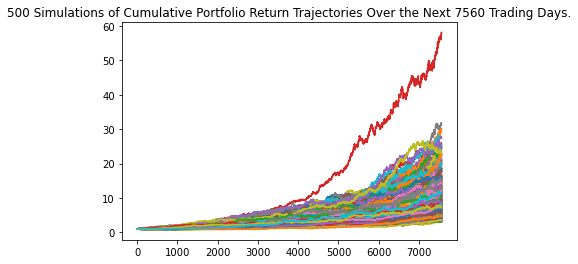

In [68]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot =mc_thirty_year.plot_simulation()

In [69]:
# Plot probability distribution and confidence intervals

simulated_returns_data = {
    "mean": list(mc_thirty_year.simulated_return.mean(axis=1)),
    "median": list(mc_thirty_year.simulated_return.median(axis=1)),
    "min": list(mc_thirty_year.simulated_return.min(axis=1)),
    "max": list(mc_thirty_year.simulated_return.max(axis=1))
}



# YOUR CODE HERE!

### Retirement Analysis

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = mc_thirty_year.summarize_cumulative_return()

# Print summary statistics

print(tbl)


count           500.000000
mean             10.079011
std               5.280217
min               3.059089
25%               6.518470
50%               8.968275
75%              12.337246
max              57.728587
95% CI Lower      3.557506
95% CI Upper     22.783938
Name: 7560, dtype: float64


In [71]:
df_simulated_returns = pd.DataFrame(simulated_returns_data)
df_simulated_returns

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000475,1.000583,0.984773,1.018311
2,1.000466,1.001017,0.978087,1.021039
3,1.001379,1.001612,0.965147,1.029330
4,1.001589,1.001992,0.967645,1.029618
...,...,...,...,...
7556,10.063607,8.930361,3.007640,57.815555
7557,10.071325,8.952188,3.029013,57.993572
7558,10.070734,8.985728,3.020305,58.131547
7559,10.073698,8.980469,3.044501,57.877346


<AxesSubplot:title={'center':'Simulated Returns Behavior Over 30 Years'}>

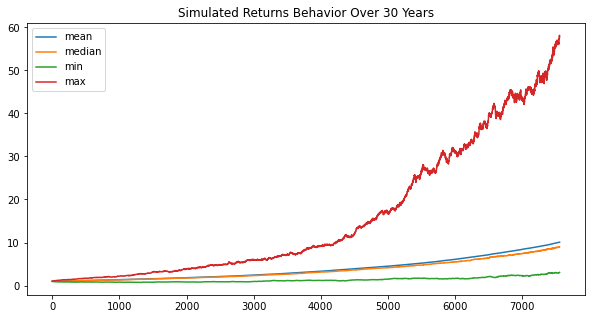

In [72]:
df_simulated_returns.plot(figsize=(10,5),  title="Simulated Returns Behavior Over 30 Years")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [73]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71150.12 and $455678.76


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [74]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $106725.18 and $683518.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [75]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
limit = 1000

mc_five_year = MCSimulation(
    portfolio_data = ticker_data,
    weights= [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

mc_five_year.portfolio_data.head()
# YOUR CODE HERE!

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-08-28 00:00:00-04:00  110.17  110.24  110.10  110.170  2822250.0   
2017-08-29 00:00:00-04:00  110.48  110.49  110.26  110.330  1710077.0   
2017-08-30 00:00:00-04:00  110.27  110.33  110.24  110.290  1357572.0   
2017-08-31 00:00:00-04:00  110.31  110.46  110.31  110.435  4179400.0   
2017-09-01 00:00:00-04:00  110.19  110.22  109.91  109.960  2579681.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-08-28 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-08-29 00:00:00-04:00     0.001452  243.11  245.15  242.93  244.85   
2017-08-30 00:00:00-04:00    -0.000363  244.83  246.32  244.62  246.04   
2017-08-31 00:00:00-04:00     0.001315  246.73  247.77  246.61  247.42   
2017-09-01 00:00:00-04:00    -0.004301  247.92  248.33  247.67  247.88   

                                                    
                               volume daily_return  
time                                                
2017-08-28 00:00:00-04:00         NaN          NaN  
2017-08-29 00:00:00-04:00  40179210.0          NaN  
2017-08-30 00:00:00-04:00  40088765.0     0.004860  
2017-08-31 00:00:00-04:00  52550897.0     0.005609  
2017-09-01 00:00:00-04:00  39588857.0     0.001859

In [76]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

mc_five_year.calc_cumulative_return()

# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003398,0.999646,0.991842,1.001683,1.003816,0.995148,0.997168,1.008518,0.999950,0.999384,...,0.995987,0.998422,0.996690,1.001831,1.000637,0.998409,1.009267,1.003607,0.998748,0.998780
2,1.003276,0.991189,0.995278,1.003532,1.010803,0.988628,0.994141,1.021934,0.997706,1.003858,...,0.985764,0.996205,1.001341,1.002047,0.999911,0.988365,1.016876,1.003705,1.002545,1.006739
3,0.998902,0.976994,0.990234,1.011783,1.005058,0.985801,0.992461,1.026142,1.004698,1.000632,...,0.984646,0.994058,1.004967,0.994996,1.001492,0.990527,1.009854,1.000640,1.003723,1.001114
4,0.992598,0.986378,0.984583,1.022098,1.002728,0.987043,0.992427,1.024703,1.002033,1.009320,...,0.983096,0.990957,1.009689,0.998107,1.012833,0.994053,1.004818,0.996012,1.000568,0.999760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.954853,1.164400,1.160993,1.863103,1.532744,1.261572,1.042817,1.097231,1.451786,1.526596,...,1.441625,1.319688,1.365104,1.477534,1.005555,1.027847,1.168185,1.232318,1.903570,1.379742
1257,0.950898,1.172179,1.157120,1.847482,1.526921,1.264759,1.033499,1.090166,1.469338,1.518448,...,1.438348,1.334018,1.369319,1.482863,1.006822,1.024312,1.173704,1.242958,1.909003,1.369137
1258,0.940731,1.167941,1.164851,1.850256,1.521049,1.256817,1.034006,1.088995,1.471328,1.523899,...,1.424880,1.334389,1.358367,1.467453,1.007626,1.031428,1.188802,1.246462,1.911066,1.376843
1259,0.944368,1.166393,1.168920,1.840886,1.516784,1.260490,1.025278,1.083490,1.482476,1.529089,...,1.439798,1.340668,1.361157,1.482302,1.009863,1.032708,1.191049,1.257664,1.905152,1.373073


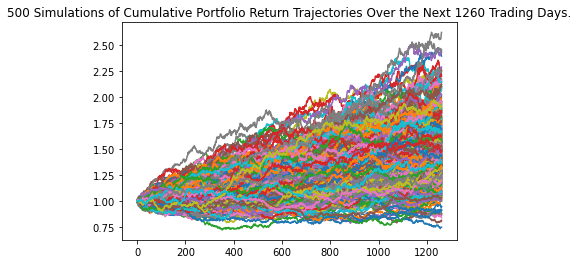

In [98]:
# Plot simulation outcomes
line_plot =mc_five_year.plot_simulation()

# YOUR CODE HERE!

In [99]:
# Plot probability distribution and confidence intervals
early_simulated_returns_data = {
    "mean": list(mc_five_year.simulated_return.mean(axis=1)),
    "median": list(mc_five_year.simulated_return.median(axis=1)),
    "min": list(mc_five_year.simulated_return.min(axis=1)),
    "max": list(mc_five_year.simulated_return.max(axis=1))
}




# YOUR CODE HERE!

In [100]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five = mc_five_year.summarize_cumulative_return()
# Print summary statistics

tbl_five


count           500.000000
mean              1.453949
std               0.291533
min               0.750505
25%               1.265801
50%               1.420323
75%               1.615256
max               2.618952
95% CI Lower      0.973423
95% CI Upper      2.140930
Name: 1260, dtype: float64

In [101]:
df_simulated_returns_five = pd.DataFrame(early_simulated_returns_data)
df_simulated_returns_five

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000489,1.000412,0.982905,1.017937
2,1.000887,1.001162,0.975026,1.027619
3,1.001136,1.001555,0.964178,1.029752
4,1.001325,1.001218,0.960376,1.035280
...,...,...,...,...
1256,1.452680,1.418417,0.745415,2.558767
1257,1.452958,1.419282,0.748712,2.556484
1258,1.453632,1.417423,0.749794,2.581613
1259,1.453836,1.418250,0.751017,2.602466


<AxesSubplot:title={'center':'Simulated Returns Behavior Over 5 Years'}>

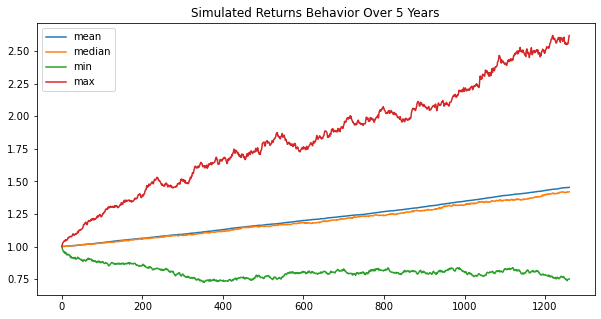

In [102]:
df_simulated_returns_five.plot(figsize=(10,5),  title="Simulated Returns Behavior Over 5 Years")

In [103]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!


ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19468.47 and $42818.61


### Ten Years Retirement Option

In [104]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

limit = 1000

mc_ten_year = MCSimulation(
    portfolio_data = ticker_data,
    weights= [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

mc_ten_year.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-08-28 00:00:00-04:00  110.17  110.24  110.10  110.170  2822250.0   
2017-08-29 00:00:00-04:00  110.48  110.49  110.26  110.330  1710077.0   
2017-08-30 00:00:00-04:00  110.27  110.33  110.24  110.290  1357572.0   
2017-08-31 00:00:00-04:00  110.31  110.46  110.31  110.435  4179400.0   
2017-09-01 00:00:00-04:00  110.19  110.22  109.91  109.960  2579681.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-08-28 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-08-29 00:00:00-04:00     0.001452  243.11  245.15  242.93  244.85   
2017-08-30 00:00:00-04:00    -0.000363  244.83  246.32  244.62  246.04   
2017-08-31 00:00:00-04:00     0.001315  246.73  247.77  246.61  247.42   
2017-09-01 00:00:00-04:00    -0.004301  247.92  248.33  247.67  247.88   

                                                    
                               volume daily_return  
time                                                
2017-08-28 00:00:00-04:00         NaN          NaN  
2017-08-29 00:00:00-04:00  40179210.0          NaN  
2017-08-30 00:00:00-04:00  40088765.0     0.004860  
2017-08-31 00:00:00-04:00  52550897.0     0.005609  
2017-09-01 00:00:00-04:00  39588857.0     0.001859

In [105]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998536,1.004229,0.999852,1.002761,1.000783,1.000437,0.988884,0.997113,0.999927,1.003050,...,0.995891,1.012716,0.995590,0.987894,1.000940,1.003339,0.996596,1.003674,0.990347,0.997896
2,1.001085,1.003466,0.993158,1.006598,0.998057,1.000455,1.000997,0.997519,0.999271,0.992062,...,0.985886,1.015782,0.992171,0.990619,1.011151,0.999952,0.985044,1.009030,0.984314,0.991432
3,1.004631,0.998992,0.990925,1.002140,0.996973,1.002175,1.006056,0.994869,1.004399,0.998108,...,0.978365,1.016029,0.992121,0.993716,1.009943,0.998643,0.987244,1.007582,0.986076,1.000087
4,1.003107,0.995616,0.989491,0.990716,0.990299,1.009275,1.004476,0.994521,0.998151,0.994976,...,0.968519,1.013613,0.991365,0.995558,1.007261,0.999802,0.982734,1.001431,0.993250,1.010048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.952475,2.017235,4.658178,1.625045,2.294963,2.121927,1.808238,1.789337,3.337512,1.165376,...,2.204678,1.577780,2.291203,2.254826,2.219975,1.404167,2.618831,1.815344,1.451236,2.044434
2517,1.959155,2.030169,4.641300,1.631082,2.284618,2.136446,1.819102,1.771903,3.319067,1.160818,...,2.214893,1.588669,2.272549,2.263185,2.213352,1.409363,2.614614,1.822183,1.444104,2.040745
2518,1.949975,2.042906,4.670369,1.617674,2.260455,2.136909,1.819013,1.788242,3.288815,1.162683,...,2.229601,1.587176,2.268916,2.267244,2.201969,1.405391,2.597067,1.822000,1.438736,2.035662
2519,1.937952,2.061263,4.664726,1.624305,2.270045,2.136124,1.839992,1.790490,3.279112,1.165082,...,2.245700,1.584132,2.244883,2.262621,2.195544,1.405738,2.600697,1.832095,1.447776,2.036429


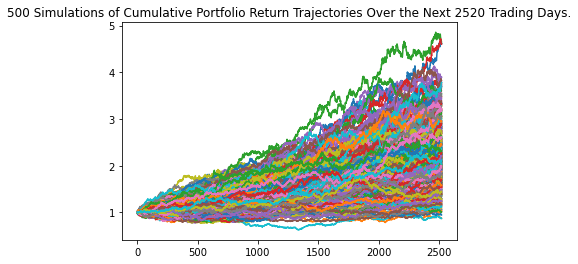

In [106]:
# Plot simulation outcomes
line_plot =mc_ten_year.plot_simulation()

In [107]:
# Plot probability distribution and confidence intervals
half_simulated_returns_data = {
    "mean": list(mc_ten_year.simulated_return.mean(axis=1)),
    "median": list(mc_ten_year.simulated_return.median(axis=1)),
    "min": list(mc_ten_year.simulated_return.min(axis=1)),
    "max": list(mc_ten_year.simulated_return.max(axis=1))
}

# YOUR CODE HERE!

In [108]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl_ten = mc_ten_year.summarize_cumulative_return()
tbl_ten
# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              2.114639
std               0.613133
min               0.869173
25%               1.705193
50%               2.022336
75%               2.447839
max               4.618016
95% CI Lower      1.139956
95% CI Upper      3.520668
Name: 2520, dtype: float64

In [109]:
df_simulated_returns_ten = pd.DataFrame(half_simulated_returns_data)
df_simulated_returns_ten

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999968,1.000020,0.982814,1.016352
2,1.000296,1.000351,0.974730,1.021852
3,1.000561,1.000371,0.971735,1.028929
4,1.000514,1.000100,0.968519,1.034864
...,...,...,...,...
2516,2.112189,2.024134,0.868669,4.658178
2517,2.113612,2.019385,0.866474,4.644295
2518,2.114464,2.019454,0.867400,4.670369
2519,2.114787,2.021554,0.869729,4.664726


<AxesSubplot:title={'center':'Simulated Returns Behavior Over 10 Years'}>

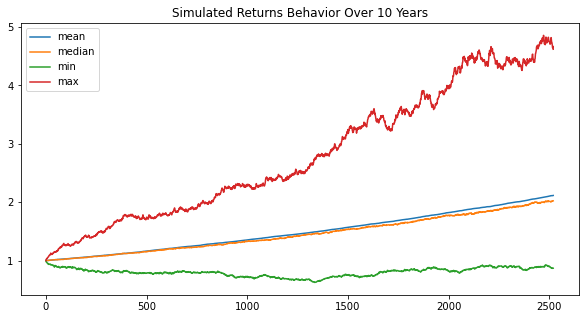

In [110]:
df_simulated_returns_ten.plot(figsize=(10,5),  title="Simulated Returns Behavior Over 10 Years")

In [111]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $22799.13 and $70413.36
